In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

In [2]:
import fpcore
import lambdas

import matplotlib.pyplot as plt

from interval import Interval
from lambdas import *
from plot_lambda import plot_lambda
from compare_plot_lambda import compare_plot_lambda

In [3]:
from fpcore.interface import *
x = var("x")
dom = Interval("(- (/ PI 2))", "(/ PI 2)")
samples = 2**17

<Axes: title={'center': 'Absolute error for sin order 4'}, xlabel='Input', ylabel='Error'>

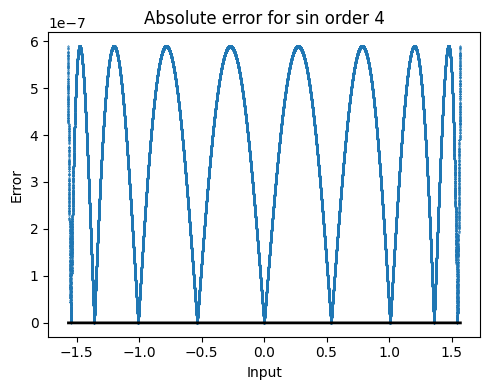

In [4]:
low_degree_sin = \
    General(
        MinimaxPolynomial(
            make_function([x], sin(x)),
            dom,
            4
        ))
plot_lambda(dom, low_degree_sin, "sin order 4", samples)

<Axes: title={'center': 'Absolute error for sin order 12'}, xlabel='Input', ylabel='Error'>

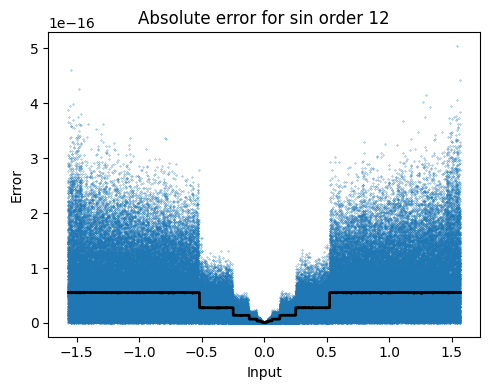

In [5]:
high_degree_sin = \
    General(
        MinimaxPolynomial(
            make_function([x], sin(x)),
            dom,
            12
        ))
plot_lambda(dom, high_degree_sin, "sin order 12", samples)

<Axes: title={'center': 'Absolute error for sin order 12 Horner'}, xlabel='Input', ylabel='Error'>

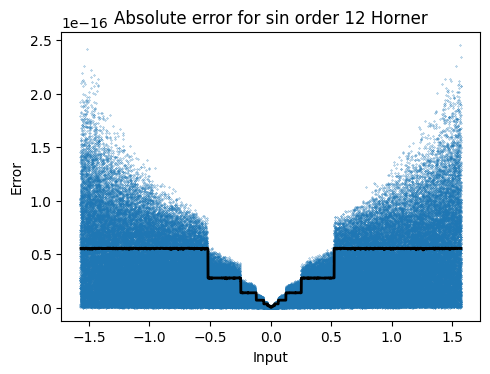

In [6]:
horner_sin = \
    Horner(
        MinimaxPolynomial(
            make_function([x], sin(x)),
            dom,
            12
        ))
plot_lambda(dom, horner_sin, "sin order 12 Horner", samples)

<Axes: title={'center': 'Absolute error for sin order 12 Estrin'}, xlabel='Input', ylabel='Error'>

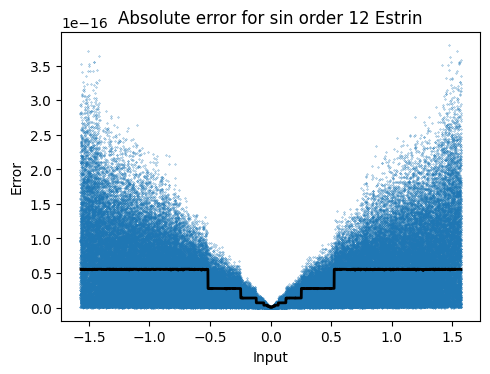

In [7]:
estrin_sin = \
    Estrin(
        MinimaxPolynomial(
            make_function([x], sin(x)),
            dom,
            12
        ))
plot_lambda(dom, estrin_sin, "sin order 12 Estrin", samples)

array([<Axes: title={'center': 'Absolute error for Horner'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for Estrin'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

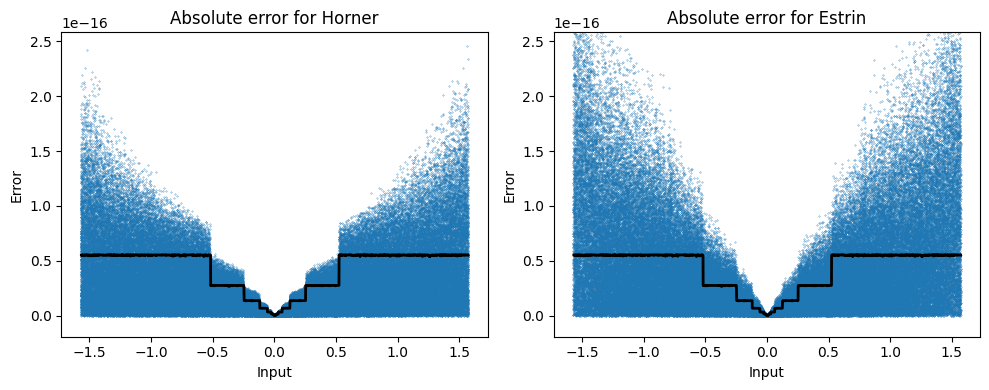

In [8]:
compare_plot_lambda(dom, horner_sin, estrin_sin, "Horner", "Estrin", samples)

2023-06-14 15:31:32.388556 add: type_check: In function: (FPCore (x)  (- (sin x) x))
2023-06-14 15:31:32.485514 add: type_check: Out function: (FPCore  (x)  (sin x))


<Axes: title={'center': 'Absolute error for fix first coefficient Horner'}, xlabel='Input', ylabel='Error'>

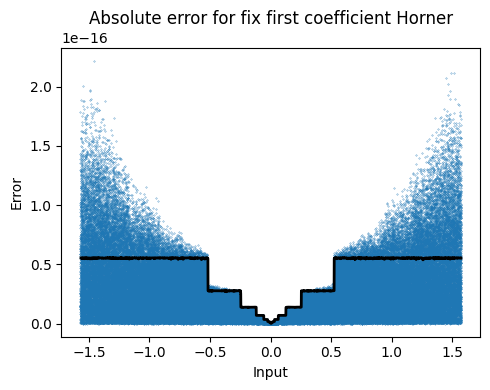

In [9]:
add_horner_sin = \
    Add(
        x,
        Horner(
            MinimaxPolynomial(
                make_function([x], sin(x) - x),
                dom,
                11
            )))
plot_lambda(dom, add_horner_sin, "fix first coefficient Horner", samples)

<Axes: title={'center': 'Absolute error for fix first coefficient Estrin'}, xlabel='Input', ylabel='Error'>

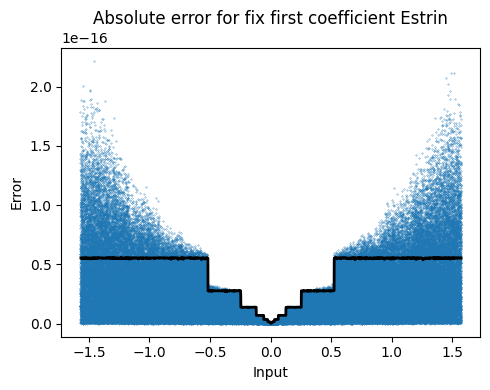

In [10]:
add_estrin_sin = \
    Add(
        x,
        Estrin(
            MinimaxPolynomial(
                make_function([x], sin(x) - x),
                dom,
                11
            )))
plot_lambda(dom, add_horner_sin, "fix first coefficient Estrin", samples)

2023-06-14 15:31:44.041889 add: type_check: In function: (FPCore (x)  (- (sin x) x))
2023-06-14 15:31:44.142857 add: type_check: Out function: (FPCore  (x)  (sin x))


array([<Axes: title={'center': 'Absolute error for Horner'}, xlabel='Input', ylabel='Error'>,
       <Axes: title={'center': 'Absolute error for Estrin'}, xlabel='Input', ylabel='Error'>],
      dtype=object)

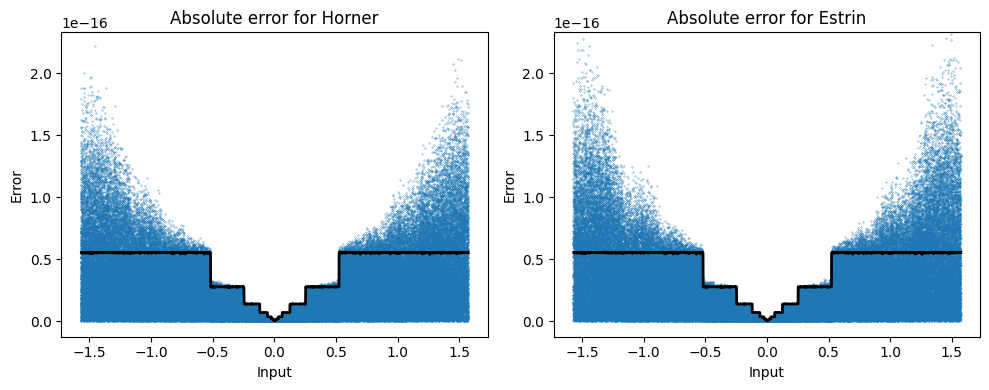

In [11]:
compare_plot_lambda(dom, add_horner_sin, add_estrin_sin, "Horner", "Estrin", samples)